# Мобильные приложения — Анализ поведения пользователей в мобильном приложении

### Материалы:
Презентация - https://disk.yandex.ru/i/goe1TlZnazMiDw

**Описание проекта**

Данные представлены в двух датасетах:

[mobile_dataset.csv](https://disk.yandex.ru/d/KaN8Wffo4Q510Q)

[mobile_sources.csv](https://disk.yandex.ru/d/RkfgQSEt-zD6Uw)


В мобильном приложении "Ненужные вещи" пользователи продают свои ненужные вещи, размещая их на доске объявлений. Нужно разобраться, как ведут себя пользователи мобильного приложения. Выделить сценарии использования приложения, найти особенности и закономерности

**Цель исследования:**

Управление вовлеченностью аудитории, адаптировать приложение по целевой и смежной аудитории. На основе данных сформулировать гипотезы для оптимизации приложения.

**Ход исследования:**

- 1 Шаг

  Открытие файла. Изучение общей информации


- 2  Шаг

  Подготовка данных
    - проверить даные на корректность написания названия колонок
    - привести к нужному формату, если это необходимо
    - проверить данные на дубликаты и пропуски
    - проверить, какие данные еще могут понадобится в анализе (столбец с датой)
    
    
- 3  Шаг

  Исследовательский анализ данных
  Ответить на вопросы:
    - Сколько всего событий в логе?
    - Сколько всего пользователей в логе?
    - Сколько в среднем событий приходится на пользователя?
    - Данными за какой период мы располагаем? Максимальная и минимальная дата.
    - Какие действия чаще совершают те пользователи, которые просматривают контакты?
    - Выделить сессии пользователей
     
    
- 4  Шаг

  Изучение воронки событий

- Построить воронку и проанализировать связь целевого события — просмотра контактов — и других действий пользователей.
- Изучить коэффициент корреляции, построить графики и проанализировать влияние событий на совершение целевого события
- Ответить на вопросы:
    - Какие события влияют на конверсию в целевое действие?
    - Какие сценарии использования приложения выделяются?
    - Как различается время между распространенными событиями пользователей?
    
    
- 5  Шаг


- Проверка статистических гипотез
  
  Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show. Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.
  
  Гипотеза: конверсия в целевое действие выше у пользователей, посмотревших фотографии.
Нулевая гипотеза: нет статистически значимой разницы конверсии у двух групп
Альтернативная: между группами есть статистически значимая разница


- 6  Шаг

  Выводы

### **Описание данных:**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Колонки в *mobile_sources.csv*: 

- `userId` — идентификатор пользователя,
- `source` — источник, с которого пользователь установил приложение.

Колонки в mobile_dataset.csv: **

- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Виды действий:

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1`—`search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

In [1]:
# импорт библиотек
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import math as mth
from plotly import graph_objects as go

In [2]:
%pip install -U kaleido -q

import plotly.io as pio
pio.renderers.default = "png"

Note: you may need to restart the kernel to use updated packages.


In [3]:
%autosave 30

Autosaving every 30 seconds


## Открытие файла, изучение общей информации

In [4]:
# чтение файлов
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [5]:
mobile_sourсes.head() # обзор данных mobile_sourсes

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


В ближайшем анализе эти данные нам не пригодятся. Сосредоточимся на датасете mobile_dataset

In [6]:
mobile_dataset.head(15) # обзор данных mobile_dataset

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894


In [7]:
mobile_dataset.info() # получение общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
mobile_dataset.duplicated().sum() # проверка данных на дубликаты

0

**Выводы:**

 В блоке изучения информации я выяснила:
 
   - В данных 74197 событий
   - Пропусков не обнаружено 
   - Дубликатов не обнаружено
   - Столбец со временем в формате object

Приняла решение:

 Переформатировать столбец, где указано время. Переименую столбцы в соответствии с хорошим стилем.

## Подготовка данных

In [9]:
mobile_dataset['event.time'] = pd.to_datetime(mobile_dataset['event.time']) # привела к формату даты и времени

In [10]:
mobile_dataset.columns = ['event_time', 'event_name', 'user_id'] # Поменяла названия столбцов

In [11]:
# добавим новый столбец, куда запишем отдельно дату
mobile_dataset['date'] = mobile_dataset['event_time'].dt.date
mobile_dataset['date'] = mobile_dataset['date'].astype('datetime64') # приведем к нужному формату

In [12]:
mobile_dataset.info() # Проверка метода

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   date        74197 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 2.3+ MB


По описанию данных вид действий `contacts_show` и `show_contacts` - это одно и тоже действие - посмотрел номер телефона. Переименую show_contacts, тем самым обёединив эти действия.

In [13]:
mobile_dataset['event_name'] = (mobile_dataset['event_name']
                                .str.replace('show_contacts', 'contacts_show', regex = True))

In [14]:
mobile_dataset['event_name'].value_counts() # Проверка метода

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

В описании данных встречается 7 разных методов поиска `search_1—search_7`. Нам для анализа важно установить сам факт поиска, поэтому объеденю их в одно название `search`

In [15]:
# функция для объединения search
def replace_search(x):
    if x in ['search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7']:
        return 'search'
    return x

In [16]:
mobile_dataset['event_name'] = mobile_dataset['event_name'].apply(replace_search) # применим функцию к столбцу

In [17]:
mobile_dataset['event_name'].value_counts() # Проверка метода

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

In [18]:
mobile_dataset.duplicated().sum() # проверка данных на дубликаты

0

**Выводы:**

В блоке предобработки я 
- изменила названия колонок
- переформатировала столбец с датой и временем
- добавила новвый столбец отдельно с датой
- объединила действие просмотра номера телефона
- изменила названия поисковых действий

## Исследовательский анализ данных

Добавим информацию о пользовательских сессиях в столбец session_id

In [19]:
mobile_dataset = mobile_dataset.sort_values(['user_id', 'event_time'])
# разобьем на пользовательские сессии по 40 минут
g = (mobile_dataset.groupby('user_id')['event_time'].diff() > pd.Timedelta('40Min')).cumsum()
# запишем новые данные в столбец session_id
mobile_dataset['session_id'] = mobile_dataset.groupby(['user_id', g], sort=False).ngroup() + 1
mobile_dataset

,event_time,event_name,user_id,date,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
...,...,...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10029
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10029
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10029
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10029


Посмотрим данными за какой период мы располагаем

In [20]:
print(mobile_dataset['date'].min())
print(mobile_dataset['date'].max())

2019-10-07 00:00:00
2019-11-03 00:00:00


Мы располагаем данными с 7 октября по 3 ноября 2019 года.
Посмотрим как распределены события по дате и времени

Построим гистограмму 

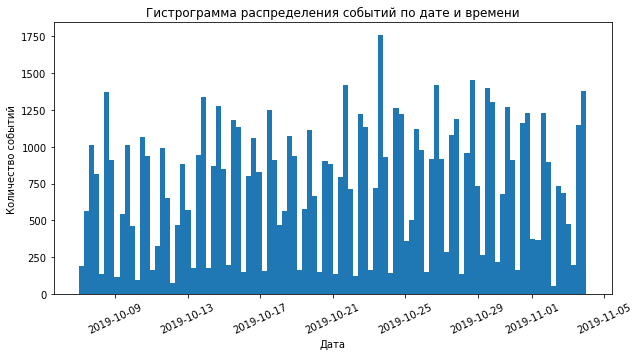

In [21]:
# Построем гистограмму по дате и времени
plt.figure(figsize=(10,5))
plt.hist(mobile_dataset['event_time'], bins=100)
plt.title('Гистрограмма распределения событий по дате и времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(rotation = 25)
plt.show();

Данные распределены равномерно, заметны снижения активности вероятно в ночное время

In [22]:
print('всего событий в датасете:', len(mobile_dataset)) # каждая запись в данных - событие

всего событий в датасете: 74197


In [23]:
print('Количествово уникальных пользователей в логе:', mobile_dataset['user_id'].nunique())

Количествово уникальных пользователей в логе: 4293


In [24]:
print('среднее количество событий по всему датасету на одного пользователя:', round(len(mobile_dataset) / mobile_dataset['user_id'].nunique()))

среднее количество событий по всему датасету на одного пользователя: 17


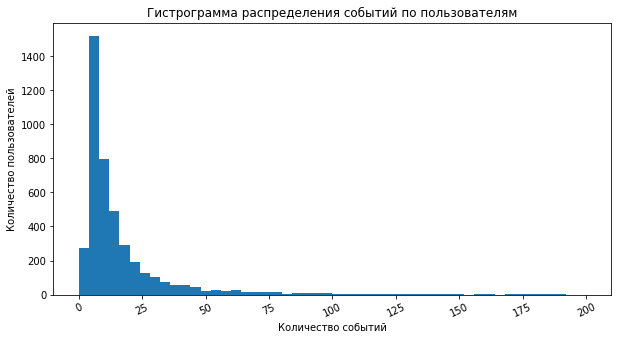

In [25]:
# Построем гистограмму распределения событий по пользователям
plt.figure(figsize=(10,5))
plt.hist(mobile_dataset.groupby('user_id').agg({'event_name':'count'}), bins=50, range=[0,200])
plt.title('Гистрограмма распределения событий по пользователям')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.xticks(rotation = 25)
plt.show();

In [26]:
# наиболее часто встречающееся значение количества событий на пользователя 
(mobile_dataset.groupby('user_id').agg({'event_name':'count'})).mode()

,event_name
0,5


Обнаружены выбивающиеся значения. Чтобы не потерять данные я не буду удалять эти строки. Таких пользователей очень мало, но возможно, там скрываются интересные сессии.

Какие действия чаще совершают те пользователи, которые просматривают контакты?

In [27]:
# создадим отфильтрованную таблицу. оставим в ней только целевое действие contacts_show
df_filtred = mobile_dataset[mobile_dataset['event_name'] == 'contacts_show']
df_filtred

,event_time,event_name,user_id,date,session_id
33533,2019-10-20 19:17:18.659799,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20,6
33544,2019-10-20 19:23:11.839947,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20,6
33565,2019-10-20 19:30:31.912891,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20,6
33616,2019-10-20 20:04:53.349091,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20,6
60714,2019-10-29 21:26:40.258472,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-29,8
...,...,...,...,...,...
72342,2019-11-03 14:38:51.134084,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10028
72349,2019-11-03 14:41:24.780546,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10028
72353,2019-11-03 14:42:26.444553,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10028
72552,2019-11-03 15:48:05.420247,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10029


In [28]:
# подгрузим все данные из таблицы mobile_dataset только для тех пользователей, кто дошел до целевого действия
df_filtred = mobile_dataset[mobile_dataset['user_id'].isin(df_filtred['user_id'])]
df_filtred

,event_time,event_name,user_id,date,session_id
31632,2019-10-19 21:34:33.849769,search,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
31636,2019-10-19 21:35:19.296599,search,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
31640,2019-10-19 21:36:44.344691,search,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
31655,2019-10-19 21:40:38.990477,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
31659,2019-10-19 21:42:13.837523,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
...,...,...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10029
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10029
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10029
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10029


In [29]:
# запишем количество уникальных пользователей, которые совершали целевое действие в переменную
users_count = df_filtred['user_id'].nunique()
users_count

981

In [30]:
target_grouped = (df_filtred.groupby('event_name')
                  .agg({'event_name':'count', 'user_id':'nunique'})
                  .sort_values(by='user_id', ascending=False))
target_grouped.columns = ['n_events', 'user_id']
target_grouped = target_grouped.reset_index()
target_grouped['funnel'] = (target_grouped['user_id']/users_count * 100).round(1)
target_grouped.sort_values(by='n_events', ascending=False)

,event_name,n_events,user_id,funnel
1,tips_show,12768,516,52.6
0,contacts_show,4529,981,100.0
3,photos_show,3828,339,34.6
2,search,2084,377,38.4
6,advert_open,1589,138,14.1
4,map,1101,289,29.5
5,contacts_call,541,213,21.7
7,favorites_add,424,136,13.9
8,tips_click,333,100,10.2


**Вывод:**

В блоке исследовательский анализ данных я узнала, что:

- Всего событий в данных 74197
- Всего пользователей: 4293
- Количество пользователей, которые совершили целевое действие: 981
- В среднем на одного пользователя приходится 17 событий
- Наиболее часто встречающееся значение количества событий на пользователя -5
- были обнаружены выбивающиеся значения. Приняла решение оставить данные как есть
- Мы располагаем данными с 7 октября по 3 ноября 2019 года.Данные распределены равномерно, заметны снижения активности вероятно в ночное время.
- Пользователи, которые просматривают контакты, чаще всего видят рекомендованные объявления (`tips_show`). Но это действие генерируется автоматически. Если его не учитывать, то `contacts_show, photos_show, search` - наиболее популярные действия пользователей.


- Добавила столбец session_id, в который записала уникальный идентификатор пользовательской сессии с разбивкой на интервал 40 минут

## Изучение воронки событий

Задача: построить воронку и проанализировать связь целевого события — просмотра контактов — и других действий пользователей.

In [31]:
# Подготовим данные. Построим сводную таблицу по всем пользователям и событиям

all_users = mobile_dataset['user_id'].nunique() # Количество всех уникальныз пользователей

data_grouped = (mobile_dataset.groupby('event_name')
                .agg({'event_name':'count', 'user_id':'nunique'})
                .sort_values(by='user_id', ascending=False))
data_grouped.columns = ['n_events', 'user_id']
data_grouped = data_grouped.reset_index()
data_grouped['funnel'] = (data_grouped['user_id']/all_users * 100).round(1)
data_grouped

,event_name,n_events,user_id,funnel
0,tips_show,40055,2801,65.2
1,search,6784,1666,38.8
2,map,3881,1456,33.9
3,photos_show,10012,1095,25.5
4,contacts_show,4529,981,22.9
5,advert_open,6164,751,17.5
6,favorites_add,1417,351,8.2
7,tips_click,814,322,7.5
8,contacts_call,541,213,5.0


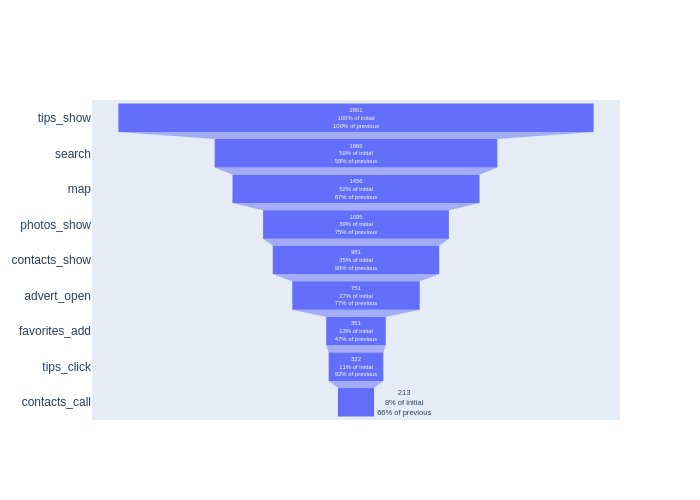

In [32]:
fig = go.Figure(go.Funnel(x = data_grouped['user_id'], y = data_grouped['event_name'], textinfo = "value+percent initial+percent previous"))
fig.show();

Это воронка по всем событиям для всех польователей. Из нее можем сделать следующие выводы:

- пользователей, совершивших событие advert_open меньше, чем contacts_show. это значит, что не обязтельно заходить в объявление для того чтобы посмотреть контакты. возможно кто-то заходит  по ссылке.
- функцией `contacts_call` пользуются в 4,5 раза пользователей реже, чем `contacts_show`. Пользователи уходят с сайта и общаются дальше вне нашего приложения. Это может стать точкой роста - удержать пользователей до момента завершения сделки полезно как и пользователю (обеспечение безопасной сделки), так и бизнесу (сбор более детальной информации о каждом шаге перед сделкой).
- `tips_click` не самое популярное действие среди всех пользователей. Возможно, алгоритм рекомендаций стоит пересмотреть
- для пользователей важно просмотреть территориальное расположение объявления
- для пользователей важно просмотреть фотографии объявления

Построим воронку только для тех пользователей, которые совершили целевое действие

In [33]:
# Построим сводную таблицу по отфильтрованным пользователям

target_users = mobile_dataset[mobile_dataset['event_name'] == 'contacts_show']['user_id'].unique()
target_users_count = mobile_dataset[mobile_dataset['event_name'] == 'contacts_show']['user_id'].nunique() # Количество всех уникальныз пользователей


grouped = (mobile_dataset.query('user_id in @target_users').groupby('event_name')
                .agg({'event_name':'count', 'user_id':'nunique'})
                .sort_values(by='user_id', ascending=False))
grouped.columns = ['n_events', 'user_id']
grouped = grouped.reset_index()
grouped['funnel'] = (grouped['user_id']/all_users * 100).round(1)
grouped

,event_name,n_events,user_id,funnel
0,contacts_show,4529,981,22.9
1,tips_show,12768,516,12.0
2,search,2084,377,8.8
3,photos_show,3828,339,7.9
4,map,1101,289,6.7
5,contacts_call,541,213,5.0
6,advert_open,1589,138,3.2
7,favorites_add,424,136,3.2
8,tips_click,333,100,2.3


<a id='pr'></a>

**Вывод**

Тут важно обратить внимание, что пользователи часто совершают целевое событие, минуя все другие шаги

### Выделим характерные сценарии. Как пользователи доходят до целевого события

События `tips_show` в датасете больше других. Так как оно генерируется автоматически и не совершается пользователем, посмотрим на сессии без этого события

In [34]:
pattern = (mobile_dataset[mobile_dataset['event_name'] != 'tips_show'].
                        groupby('session_id', as_index=False)
                        .agg(event_flow=('event_name', 'unique')))
pattern['event_flow'] = pattern['event_flow'].astype(str)
pattern['event_flow'].value_counts().to_frame().head(30)

,event_flow
['photos_show'],1263
['search'],1161
['map'],867
['contacts_show'],584
['search' 'photos_show'],521
['advert_open'],307
['map' 'advert_open'],296
['search' 'map'],209
['tips_click'],189
['map' 'contacts_show'],147


Несмотря на хаотичность паттернов поведения в таблице, все же можно выделить интересующие нас сценарии. Посмотрим на те, которые заканчиваются целевым событием. Это: 
- map -> contacts_show
- search -> contacts_show
- photos_show -> contacts_show
- search -> photos_show -> contacts_show
_________
**Вывод:**

В наиболее популярных сценариях пользователи игнорируют шаг `advert_open` и `tips_click`.
В наиболее популярных сценариях пользователи попадают на целевое событие за одно действие или два.

### Построим воронки в целевое действие в разрезе выделенных сценариев

In [35]:
# Функция для построения строгой воронки для двух действий
def funnel_2 (data, event1, event2):
    a = data[data['event_name'] == event1]
    a_id = a['user_id'].unique()
    a = a['user_id'].nunique()
 
    b = data.query('user_id in @a_id')
    b = b[b['event_name'] == event2]
    b_id = b['user_id'].unique()
    b = b['user_id'].nunique()
 
    x = [a, b]
    y = [event1, event2]
 
    fig = go.Figure(go.Funnel(
        y = y,
        x = x,
        textinfo = "value+percent initial + percent previous"))
    fig.show()

**Воронка для сценария map - contacts_show**

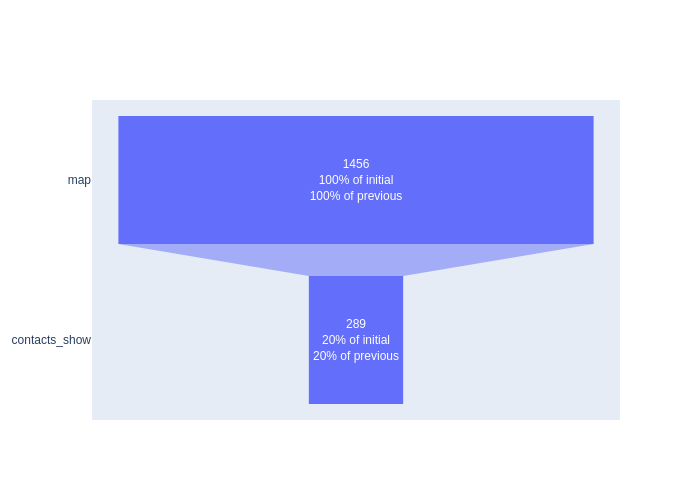

In [36]:
funnel_2(mobile_dataset, 'map', 'contacts_show')

**Воронка для сценария search - contacts_show**

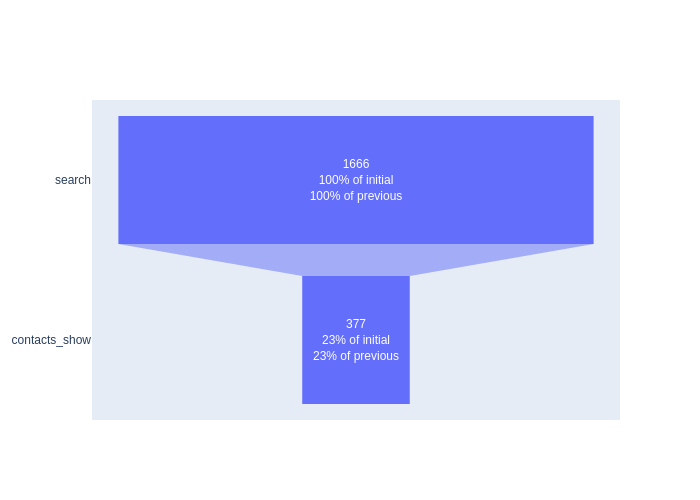

In [37]:
funnel_2(mobile_dataset, 'search', 'contacts_show')

**Воронка для сценария photos_show - contacts_show**

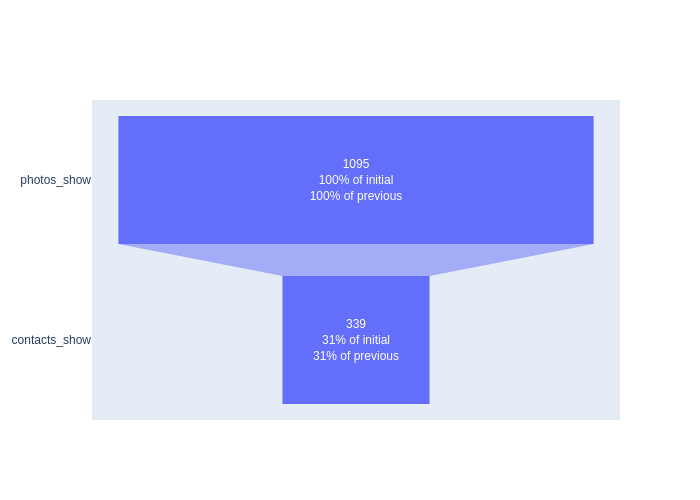

In [38]:
funnel_2(mobile_dataset, 'photos_show', 'contacts_show')

In [39]:
# Функция для построения строгой воронки для трех действий
def funnel_3 (data, event1, event2, event3):
    a = data[data['event_name'] == event1]
    a_id = a['user_id'].unique()
    a = a['user_id'].nunique()
 
    b = data.query('user_id in @a_id')
    b = b[b['event_name'] == event2]
    b_id = b['user_id'].unique()
    b = b['user_id'].nunique()
 
    c = data.query('user_id in @b_id')
    c = c[c['event_name'] == event3]
    c = c['user_id'].nunique()
 
    x = [a, b, c]
    y = [event1, event2, event3]
 
    fig = go.Figure(go.Funnel(
        y = y,
        x = x,
        textinfo = "value+percent initial + percent previous"))
    fig.show()

**Воронка для сценария search - photos_show - contacts_show**

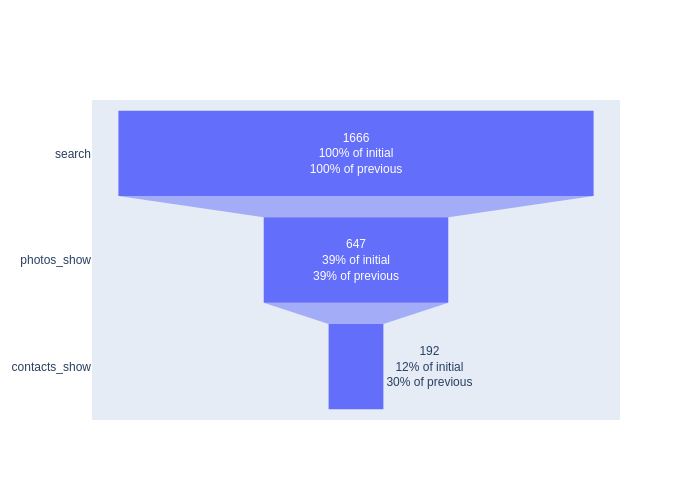

In [40]:
funnel_3(mobile_dataset, 'search', 'photos_show', 'contacts_show')

**Вывод:**

Из трех первых сценариев самым успешным с точки зрения таргета оказался 'photos_show' - 'contacts_show'. Более 30% пользователей переходят на шаг просмотра контактов после просмотра фотографий. Для сценариев map и search это 20 и 23 % соответственно. 
______
За три шага воронка теряет 88% пользователей. Возможно стоит обратить внимание на конверсию пользователей после шага search. Находят ли они необходимые объявления

Помимо основных сценариев, посмотрим на конверсию в целевое действие по всему функционалу приложения


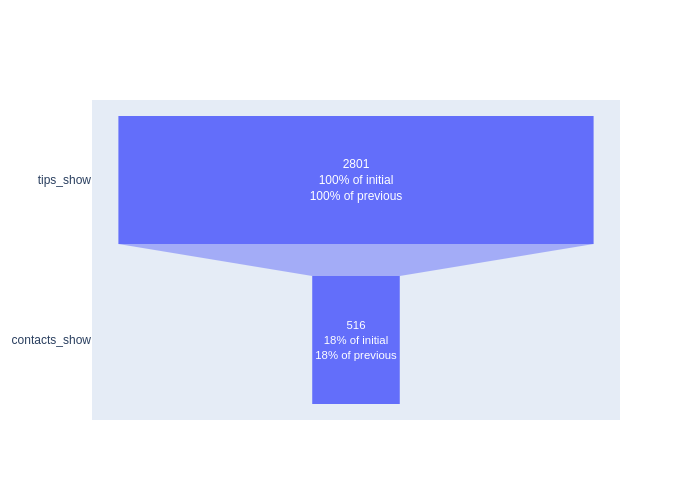

In [41]:
# показ объявления - целевое
funnel_2(mobile_dataset, 'tips_show', 'contacts_show')

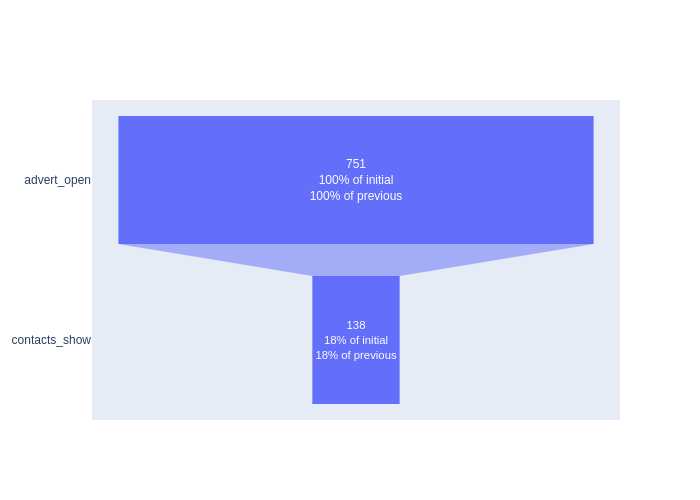

In [42]:
# открытие объявления - целевое
funnel_2(mobile_dataset, 'advert_open', 'contacts_show')

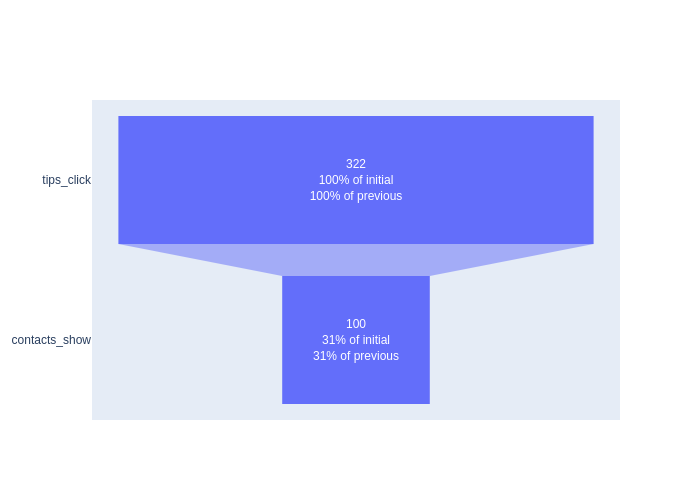

In [43]:
# открытие рекламного объявления - целевое
funnel_2(mobile_dataset, 'tips_click', 'contacts_show')

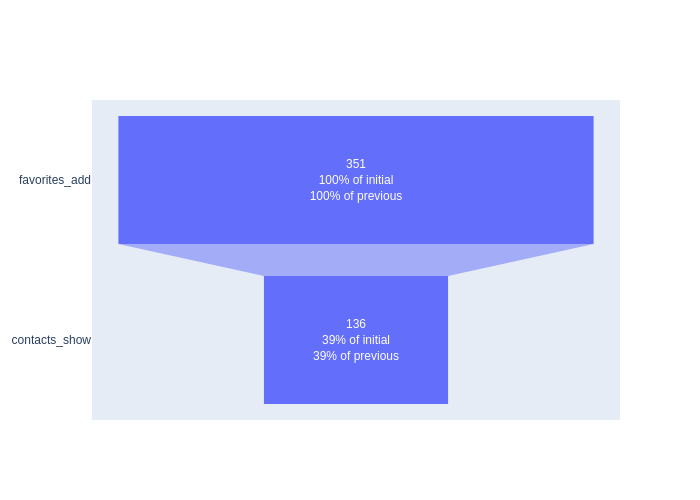

In [44]:
# добавление в избранное - целевое
funnel_2(mobile_dataset, 'favorites_add', 'contacts_show')

  
<div class="alert alert-block alert-info">
    
**Выводы:**

Какой функционал хорошо влияет на конверсию в просмотр контактов:
    
- `favorites_add` — `contacts_show` — `39%` конверсия
    - лидер по конверсии. Объявление понравилось, пользователь не хочет его потерять, заинтересован в приобретении и связывается с владельцем объявления
    
- `photos_show` — `contacts_show` — `31%`
    - просмотр фото показывает одну из лидирующих позиций по конверсии. Это может быть связано с тем, что фото дает больше информации о продукте и вызывает больше доверия
- `tips_click` — `contacts_show` — `31%`
    - просмотр рекомендованных объявлений показывает одну из лидирующих позиций по конверсии. Пользователи переходят на рекомендованные объявления куда чаще, чем после самостоятельного поиска
- `search` — `contacts_show` — `23%`    
- `advert_open` — `contacts_show` — `18%` 
- `map` — `contacts_show` — `20%`
- `tips_show` — `contacts_show` — `18%`
    
    
</div>

### Как различается время между распространенными событиями пользователей

In [45]:
#отфильтруем датафрейм, сохраним в нем только события ['search' 'photos_show']

search_photos = mobile_dataset.query('event_name == "search" or event_name == "photos_show"')
search_photos

,event_time,event_name,user_id,date,session_id
31632,2019-10-19 21:34:33.849769,search,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
31636,2019-10-19 21:35:19.296599,search,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
31640,2019-10-19 21:36:44.344691,search,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
31655,2019-10-19 21:40:38.990477,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
31659,2019-10-19 21:42:13.837523,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5
...,...,...,...,...,...
54919,2019-10-28 07:08:57.160017,search,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-28,9999
54920,2019-10-28 07:13:03.805332,search,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-28,9999
54921,2019-10-28 07:14:21.177488,photos_show,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-28,9999
54922,2019-10-28 07:15:10.094101,photos_show,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-28,9999


In [46]:
# отоберем те сессии, где встречаются оба этих события в рамках одной сессии
search_photos = search_photos.groupby(['session_id', 'event_name'], as_index=False).agg(time_event=('event_time', 'min'))
search_photos

,session_id,event_name,time_event
0,5,photos_show,2019-10-19 21:40:38.990477
1,5,search,2019-10-19 21:34:33.849769
2,6,photos_show,2019-10-20 18:59:22.541082
3,6,search,2019-10-20 18:49:24.115634
4,7,photos_show,2019-10-24 10:50:40.219833
...,...,...,...
5403,9997,photos_show,2019-10-21 16:49:57.103308
5404,9997,search,2019-10-21 16:39:33.867145
5405,9998,photos_show,2019-10-22 16:10:01.689369
5406,9999,photos_show,2019-10-28 07:02:12.857112


In [47]:
search_photos = search_photos.sort_values(['session_id', 'time_event']) # отсортирую по времени

In [48]:
print('среднее время между событиями:', search_photos.groupby('session_id')['time_event'].diff().mean())
print('медиана времени между событиями:', search_photos.groupby('session_id')['time_event'].diff().median())

среднее время между событиями: 0 days 00:07:16.020435794
медиана времени между событиями: 0 days 00:03:27.017361500


In [49]:
# узнаем среднее время между событиями просмотр карты и открытие объявления
map_advert =  mobile_dataset.query('event_name == "map" or event_name == "advert_open"') # отфильтруем датасет
map_advert = map_advert.groupby(['session_id', 'event_name'], as_index=False).agg(time_event=('event_time', 'min'))
map_advert = map_advert.sort_values(['session_id', 'time_event'])
print('среднее время между событиями:', map_advert.groupby('session_id')['time_event'].diff().mean())
print('медиана времени между событиями:', map_advert.groupby('session_id')['time_event'].diff().median())

среднее время между событиями: 0 days 00:06:01.215780092
медиана времени между событиями: 0 days 00:01:50.356816


In [50]:
# узнаем среднее время между событиями просмотр карты и просмотр контакта
map_contacts_show =  mobile_dataset.query('event_name == "map" or event_name == "contacts_show"') # отфильтруем датасет
map_contacts_show = (map_contacts_show
                     .groupby(['session_id', 'event_name'], as_index=False).agg(time_event=('event_time', 'min')))
map_contacts_show = map_contacts_show.sort_values(['session_id', 'time_event'])
print('среднее время между событиями:', map_contacts_show.groupby('session_id')['time_event'].diff().mean())
print('медиана времени между событиями:', map_contacts_show.groupby('session_id')['time_event'].diff().median())

среднее время между событиями: 0 days 00:12:47.068361196
медиана времени между событиями: 0 days 00:05:48.156634


<AxesSubplot:>

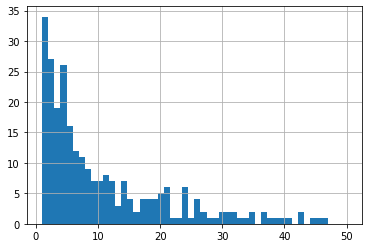

In [51]:
map_contacts_show.groupby('session_id')['time_event'].diff().astype('timedelta64[m]').hist(bins=50, range=(1,50))

**Выводы:**

Время между событиями от 2 до 6 минут. 

**Выводы:**

**Какие сценарии использования приложения выделяются?**
 В блоке визуализации я выделила несколько сценариев пользовательского поведения:
 
- map -> contacts_show
- search -> contacts_show
- photos_show -> contacts_show
- search -> photos_show -> contacts_show

**Какие события влияют на конверсию в целевое действие?**

Какой функционал хорошо влияет на конверсию в просмотр контактов:
    
- `favorites_add` — `contacts_show` — `39%` конверсия
    - лидер по конверсии. Объявление понравилось, пользователь не хочет его потерять, пользователь заинтересован в приобретении и связывается с владельцем объявления
    
- `photos_show` — `contacts_show` — `31%`
    - просмотр фото показывает одну из лидирующих позиций по конверсии. Это может быть связано с тем, что фото дает больше информации о продукте и вызывает больше доверия
- `tips_click` — `contacts_show` — `31%`
    - просмотр рекомендованных объявлений показывает одну из лидирующих позиций по конверсии. Пользователи переходят на рекомендованные объявления куда чаще, чем после самостоятельного поиска

**Как различается время между распространенными событиями пользователей?**
- Среднее время между разными событиями варьируется `от 2 до 6 минут`

## Проверка статистических гипотез

Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show. Сформулируем гипотезу: конверсия в просмотры контактов различается у этих двух групп.

Нулевая гипотеза: нет статистически значимой разницы конверсии у двух групп

Альтернативная: между группами есть статистически значимая разница

In [52]:
# разделим пользователей на две группы
 
# только tips_show
group1 = mobile_dataset[mobile_dataset['event_name'] == 'tips_show']
 
group1_id = group1['user_id'].unique() # id пользователей первой группы 
group1_users = group1['user_id'].nunique() # количество уникальных пользователей
 
# tips_show + tips_click
group2 = mobile_dataset.query('user_id in @group1_id')
group2 = group2[group2['event_name'] == 'tips_click'] 
 
group2_id = group2['user_id'].unique() # id пользователей второй группы 
group2_users = group2['user_id'].nunique()  # количество уникальных пользователей

Проверим группы на пересечение пользователей


In [53]:
# посмотрим сколько пользователей попали в обе группы
ab_users = (mobile_dataset.loc[mobile_dataset['user_id'].isin(group1['user_id']) 
                               & mobile_dataset['user_id'].isin(group2['user_id'])])
ab_users['user_id'].nunique() # выведем число этих пользователей

297

В первой группе присутствуют пользователи, которые используют функционал tips_click. Удалим их из этой группы

In [54]:
print('количество уникальных пользователей до фильтрации:', group1_users)
group1 = group1.query('user_id not in @group2_id') # фильтрация
# обновим переменные
group1_id = group1['user_id'].unique() # id пользователей первой группы 
group1_users = group1['user_id'].nunique() # количество уникальных пользователей
print('количество уникальных пользователей после фильтрации:', group1_users)

количество уникальных пользователей до фильтрации: 2801
количество уникальных пользователей после фильтрации: 2504


Нпишем функцию, возвращающую p-value

In [55]:
def z_test(group1, group2, alpha):
    # количество успехов в первой группе:
    group1_conversion = mobile_dataset.query('user_id in @group1_id')
    group1_conversion = group1_conversion[group1_conversion['event_name'] == 'contacts_show'] 
    p1 = group1_conversion['user_id'].nunique()
 
    # количество успехов во второй группе:
    group2_conversion = mobile_dataset.query('user_id in @group2_id')
    group2_conversion = group2_conversion[group2_conversion['event_name'] == 'contacts_show'] 
    p2 = group2_conversion['user_id'].nunique()
    
    print(p1, p2, group1_users, group2_users) # КОД РЕВЬЮЕРА
 
    # пропорция успехов в комбинированном датасете:
    p_combined = ((p1 + p2) / (group1_users + group2_users))
 
    # разница количества успехов в датасетах:
    difference = p1 - p2 
 
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/group1_users + 1/group2_users))
 
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
 
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

Применим функцию к двум контрольным группам

In [56]:
z_test(group1, group2, 0.05)

425 91 2504 297
p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:**

Тест показал различие между группами. Мы можем утверждать, что событие tips_click влияет на конверсию в целевое действие

Гипотеза: конверсия в целевое действие выше у пользователей, посмотревших фотографии. Нулевая гипотеза: нет статистически значимой разницы конверсии у двух групп Альтернативная: между группами есть статистически значимая разница

In [57]:
# разделим пользователей на две группы
 
# просмотрел фотографии
group1 = mobile_dataset[mobile_dataset['event_name'] == 'photos_show']
 
group1_id = group1['user_id'].unique() # id пользователей первой группы 
group1_users = group1['user_id'].nunique() # количество уникальных пользователей
 
# пользователи, не смотревшие фотографии
group2 = mobile_dataset.query('user_id not in @group1_id')
 
group2_id = group2['user_id'].unique() # id пользователей второй группы 
group2_users = group2['user_id'].nunique()  # количество уникальных пользователей

In [58]:
# посмотрим сколько пользователей попали в обе группы
ab_users = (mobile_dataset.loc[mobile_dataset['user_id'].isin(group1['user_id']) 
                               & mobile_dataset['user_id'].isin(group2['user_id'])])
print('пользователей, попавших в обе группы:', ab_users['user_id'].nunique()) # выведем число этих пользователей

пользователей, попавших в обе группы: 0


In [59]:
z_test(group1, group2, 0.05)

339 642 1095 3198
p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


<a id='zt'></a>


Тест показал различие между группами. Мы можем утверждать, что событие photos_show влияет на конверсию в целевое действие

##  Общий вывод

В данном иследование моя задача была изучить и проанализировать поведение пользователей в мобильном приложении. Выделить сценарии использования приложения, найти особенности и закономерности.
Заказчик - отдел management - на основе результатов анализа планируется адаптировать приложение по целевой и смежной аудитории, оптимизировать приложение.

Данные были предоставленны в таблице https://code.s3.yandex.net/datasets/mobile_dataset.csv

- Первым шагом была подготовка данных. Я:

  - изучила общую информацию
  - проверила данные на пропуски и дубликаты
  - переформатировала данные с датой
  - добавила новый столбец с датой

- Далее я провела исследовательский анализ данных:
  - Всего событий в данных 74197
  - Всего пользователей: 4293
  - Количество пользователей, которые совершили целевое действие: 981
  - Мы располагаем данными с 7 октября по 3 ноября 2019 года.
  - Пользователи, которые просматривают контакты, чаще всего видят рекомендованные объявления (tips_show). Но это действие генерируется автоматически. Если его не учитывать, то contacts_show, photos_show, search - наиболее популярные действия пользователей.
  - Добавила столбец session_id, в который записала уникальный идентификатор пользовательской сессии с разбивкой на интервал 40 минут

- Изучила воронку событий и ответила на основные вопросы заказчика:

  - Установила, что пользователь может перейти к целевому действию минуя другие шаги.  [proof](#pr)
  - Среди популярных действий пользователей: поиск, просмотр карты, просмотр фотографий.
_______

**Частые сценарии поведения, которые заканчиваются целевым событием:**


- map -> contacts_show
- search -> contacts_show
- photos_show -> contacts_show
- search -> photos_show -> contacts_show
__________

**События, влияющие на конверсию в целевое действие**

Событие 'photos_show' влияет на конверсию в целевое действие. Подтверждено [z-тестом](#zt). Более 30% пользователей переходят на шаг просмотра контактов после просмотра фотографий.

favorites_add — contacts_show — 39% конверсия

лидер по конверсии. Объявление понравилось, пользователь не хочет его потерять, пользователь заинтересован в приобретении и связывается с владельцем объявления

tips_click — contacts_show — 31%

просмотр рекомендованных объявлений показывает одну из лидирующих позиций по конверсии. Пользователи переходят на рекомендованные объявления куда чаще, чем после самостоятельного поиска
Как различается время между распространенными событиями пользователей?
___________
**Время между распространенными событиями пользователей**

Среднее время между разными событиями варьируется от 2 до 6 минут

_________
- Последним шагом моего исследования было проведение статистического теста на проверку гипотез:

Оба теста опровергли нулевую гипотезу, между долями есть статистически значимая разница. Это говорит о том, что события tips_click и photos_show влияют на конверсию в целевое действие

<div class="alert alert-block alert-info">

**Рекомендации**

Точки роста для приложения
    
- Просмотр рекомендованных объявлений показал наивысшую конверсию в целевое действие. Однако, всего 3% пользуются этой функцией. Возможно, алгоритм рекомендаций стоит пересмотреть. Повысив этот показатель, при сохранении конверсии в 31%, численность пользователей, дошедших до целевого действия возрастет в разы.
___________
    
- Функцией contacts_call пользуются в 4,5 раза пользователей реже, 
чем contacts_show. Пользователи уходят с сайта и общаются дальше вне 
нашего приложения. Это может стать точкой роста -удержать пользователей 
до момента завершения сделки полезно как и пользователю (обеспечение 
безопасной сделки), так и бизнесу (сбор более детальной информации о 
каждом шаге перед сделкой).
__________
    
- Стимулировать пользователей добавлять в объявления качественные 
фотографии, так как это вызывает больше доверия и положительно 
сказывается на конверсии в целевое действие
    
</div>